# 動的計画法


*   ダイナミックプライシング例題
*   Python



#### ライブラリ読込

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### パラメータ設定


*   モデルとパラメータを設計する。



In [2]:
T = 1000  # 販売期間（日数）
N = 5000  # 在庫数
prices = np.array([5, 7, 10, 12, 15, 17, 20, 30, 40, 50, 75, 100])  # 価格候補
alpha = 0.3  # 需要価格感応度
max_demand = 1000  # 価格0のときの需要最大値

#### シミュレーション

In [3]:
# 需要関数（価格依存）
def demand(p):
    return max(0, int(max_demand * np.exp(-alpha * p)))

# -----------------------
# 動的計画法テーブル
# -----------------------
# dp[t][n]: t日目、在庫n個のときの最大期待収益
dp = np.zeros((T+1, N+1))
policy = np.zeros((T+1, N+1))  # 最適価格保存

# 後ろから計算
for t in range(T-1, -1, -1):
    for n in range(N+1):
        best_revenue = 0
        best_price = prices[0]
        for p in prices:
            sell_qty = min(n, demand(p))
            revenue = p * sell_qty + dp[t+1][n - sell_qty]
            if revenue > best_revenue:
                best_revenue = revenue
                best_price = p
        dp[t][n] = best_revenue
        policy[t][n] = best_price

# -----------------------
# 最適戦略のシミュレーション
# -----------------------
inventory = N
revenue_history = []

for t in range(T):
    price = policy[t][inventory]
    sell_qty = min(inventory, demand(price))
    revenue = price * sell_qty
    inventory -= sell_qty
    revenue_history.append(revenue)

print("総収益:", sum(revenue_history))
print("日ごとの価格戦略:", policy[:T, N].astype(int))
print("日ごとの売上:", revenue_history)

総収益: 86500.0
日ごとの価格戦略: [17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

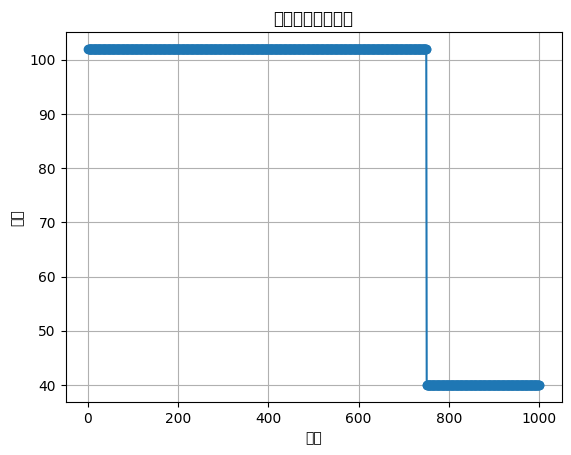

In [4]:
# -----------------------
# 可視化
# -----------------------
plt.plot(range(1, T+1), revenue_history, marker='o')
plt.xlabel("日数")
plt.ylabel("収益")
plt.title("日ごとの収益推移")
plt.grid(True)
plt.show()